### percentile 나누기

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib as mpl   
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools

air_Golden = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데싸랩/기초세션/EDA/air_SF_Golden.csv')
air_Mission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데싸랩/기초세션/EDA/air_SF_Mission.csv')
air_SF = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데싸랩/기초세션/EDA/air_SF.csv')
airbnb = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/데싸랩/기초세션/EDA/airbnb.csv')

      

#from haversine import haversine
# Some helper functions to make our plots cleaner with Plotly


In [ ]:
air_Golden['review_scores_rating'].describe(percentiles=[0.25,0.75])

#100점 = 89개, 91점 이하 83개

count    387.000000
mean      94.387597
std        7.883192
min       20.000000
25%       92.000000
50%       97.000000
75%       99.000000
max      100.000000
Name: review_scores_rating, dtype: float64

In [ ]:
air_Golden.loc[air_Golden.review_scores_rating <=91].count()

Unnamed: 0                83
price                     83
room_type                 83
accommodates              83
bathrooms                 83
bed_type                  83
cancellation_policy       83
cleaning_fee              83
description               83
host_has_profile_pic      83
host_identity_verified    83
host_response_rate        61
host_since                83
instant_bookable          83
last_review               83
latitude                  83
longitude                 83
number_of_reviews         83
review_scores_rating      83
bedrooms                  83
beds                      83
array_amenities           83
len_amenities             83
property                  83
distance_to_Golden        83
distance_to_Mission       83
landmark                  83
dtype: int64

In [ ]:
air_Mission.shape

(1996, 27)

In [ ]:
air_Mission['review_scores_rating'].describe(percentiles=[0.25,0.75])

#100점: 596개 94점 이하: 527개

count    1996.000000
mean       95.663327
std         6.159442
min        20.000000
25%        94.000000
50%        97.000000
75%       100.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [ ]:
air_Mission.loc[air_Mission.review_scores_rating <= 94].count()

Unnamed: 0                527
price                     527
room_type                 527
accommodates              527
bathrooms                 527
bed_type                  527
cancellation_policy       527
cleaning_fee              527
description               527
host_has_profile_pic      527
host_identity_verified    527
host_response_rate        377
host_since                527
instant_bookable          527
last_review               527
latitude                  527
longitude                 527
number_of_reviews         527
review_scores_rating      527
bedrooms                  527
beds                      526
array_amenities           527
len_amenities             527
property                  527
distance_to_Golden        527
distance_to_Mission       527
landmark                  527
dtype: int64

## 상하위간 비교

In [ ]:
air_Golden.columns

Index(['Unnamed: 0', 'price', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'description',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds', 'array_amenities', 'len_amenities', 'property',
       'distance_to_Golden', 'distance_to_Mission', 'landmark'],
      dtype='object')

In [ ]:
Golden_good = air_Golden[air_Golden.review_scores_rating == 100] 
Golden_Bad = air_Golden[air_Golden.review_scores_rating <= 91] 
Mission_good = air_Mission[air_Mission.review_scores_rating == 100] 
Mission_Bad = air_Mission[air_Mission.review_scores_rating <= 94] 

### amenities

#### amenities length

In [ ]:
print(air_Golden.len_amenities.describe(percentiles=[0.25,0.75]))
print(air_Mission.len_amenities.describe(percentiles=[0.25,0.75]))

count    387.000000
mean      20.521964
std        9.141740
min        1.000000
25%       14.500000
50%       19.000000
75%       24.000000
max       57.000000
Name: len_amenities, dtype: float64
count    1996.000000
mean       19.727956
std         8.350027
min         0.000000
25%        14.000000
50%        19.000000
75%        23.000000
max        72.000000
Name: len_amenities, dtype: float64


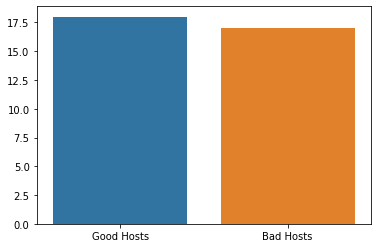

In [ ]:
amenities_good = Golden_good['len_amenities'].median()
amenities_bad = Golden_Bad['len_amenities'].median()
amenities_count = {'x':['Good Hosts','Bad Hosts'],'y':[amenities_good,amenities_bad]}
menities_bar = sns.barplot(x='x', y='y',data=amenities_count)
plt.show()

#차이가 미세하네.

#### amenities text

##### Golden_good

In [ ]:
Golden_good.columns

Index(['Unnamed: 0', 'price', 'room_type', 'accommodates', 'bathrooms',
       'bed_type', 'cancellation_policy', 'cleaning_fee', 'description',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms',
       'beds', 'array_amenities', 'len_amenities', 'property',
       'distance_to_Golden', 'distance_to_Mission', 'landmark'],
      dtype='object')

In [ ]:
G_good_amenities = Golden_good['array_amenities']
G_good_amenities.to_csv("G_good_amenities.csv")

In [ ]:
with open(r'/content/G_good_amenities.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',array_amenities\n',
 '2,"[\'TV\', \'Cable_TV\', \'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Free_parking_on_premises\', \'Indoor_fireplace\', \'Heating\', \'Family/kid_friendly\', \'Washer\', \'Dryer\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'Fire_extinguisher\', \'Essentials\', \'Hangers\', \'Hair_dryer\', \'Iron\', \'Private_entrance\']"\n',
 '12,"[\'TV\', \'Internet\', \'Wireless_Internet\', \'Air_conditioning\', \'Kitchen\', \'Heating\', \'Smoke_detector\', \'First_aid_kit\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\']"\n',
 '17,"[\'TV\', \'Kitchen\', \'Heating\', \'Family/kid_friendly\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\', \'Hair_dryer\']"\n',
 '21,"[\'Wireless_Internet\', \'Kitchen\', \'Pets_live_on_this_property\', \'Heating\', \'Essentials\', \'Shampoo\', \'Hangers\', \'Laptop_friendly_workspace\']"\n',
 '27,"[\'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Smoke_detector\', \'Ca

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

',array_amenities 2,"[\'TV\', \'Cable_TV\', \'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Free_parking_on_premises\', \'Indoor_fireplace\', \'Heating\', \'Family/kid_friendly\', \'Washer\', \'Dryer\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'Fire_extinguisher\', \'Essentials\', \'Hangers\', \'Hair_dryer\', \'Iron\', \'Private_entrance\']" 12,"[\'TV\', \'Internet\', \'Wireless_Internet\', \'Air_conditioning\', \'Kitchen\', \'Heating\', \'Smoke_detector\', \'First_aid_kit\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\']" 17,"[\'TV\', \'Kitchen\', \'Heating\', \'Family/kid_friendly\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\', \'Hair_dryer\']" 21,"[\'Wireless_Internet\', \'Kitchen\', \'Pets_live_on_this_property\', \'Heating\', \'Essentials\', \'Shampoo\', \'Hangers\', \'Laptop_friendly_workspace\']" 27,"[\'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'Fir

In [ ]:
#특수문자 제거
import re
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

' array_amenities 2    TV    Cable_TV    Internet    Wireless_Internet    Kitchen    Free_parking_on_premises    Indoor_fireplace    Heating    Family kid_friendly    Washer    Dryer    Smoke_detector    Carbon_monoxide_detector    Fire_extinguisher    Essentials    Hangers    Hair_dryer    Iron    Private_entrance    12    TV    Internet    Wireless_Internet    Air_conditioning    Kitchen    Heating    Smoke_detector    First_aid_kit    Fire_extinguisher    Essentials    Shampoo    17    TV    Kitchen    Heating    Family kid_friendly    Smoke_detector    Carbon_monoxide_detector    Fire_extinguisher    Essentials    Shampoo    Hair_dryer    21    Wireless_Internet    Kitchen    Pets_live_on_this_property    Heating    Essentials    Shampoo    Hangers    Laptop_friendly_workspace    27    Wireless_Internet    Kitchen    Heating    Smoke_detector    Carbon_monoxide_detector    Fire_extinguisher    Essentials    Shampoo    Lock_on_bedroom_door    Hangers    Hair_dryer    translation_mis

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

True

In [ ]:
text = nltk.word_tokenize(filtered_content)
text

['array_amenities',
 '2',
 'TV',
 'Cable_TV',
 'Internet',
 'Wireless_Internet',
 'Kitchen',
 'Free_parking_on_premises',
 'Indoor_fireplace',
 'Heating',
 'Family',
 'kid_friendly',
 'Washer',
 'Dryer',
 'Smoke_detector',
 'Carbon_monoxide_detector',
 'Fire_extinguisher',
 'Essentials',
 'Hangers',
 'Hair_dryer',
 'Iron',
 'Private_entrance',
 '12',
 'TV',
 'Internet',
 'Wireless_Internet',
 'Air_conditioning',
 'Kitchen',
 'Heating',
 'Smoke_detector',
 'First_aid_kit',
 'Fire_extinguisher',
 'Essentials',
 'Shampoo',
 '17',
 'TV',
 'Kitchen',
 'Heating',
 'Family',
 'kid_friendly',
 'Smoke_detector',
 'Carbon_monoxide_detector',
 'Fire_extinguisher',
 'Essentials',
 'Shampoo',
 'Hair_dryer',
 '21',
 'Wireless_Internet',
 'Kitchen',
 'Pets_live_on_this_property',
 'Heating',
 'Essentials',
 'Shampoo',
 'Hangers',
 'Laptop_friendly_workspace',
 '27',
 'Wireless_Internet',
 'Kitchen',
 'Heating',
 'Smoke_detector',
 'Carbon_monoxide_detector',
 'Fire_extinguisher',
 'Essentials',
 'Sha

In [ ]:
from collections import Counter
c= Counter(text)
print(c.most_common(30))  # carbon monoxide, gym이 있다는 특징

[('Wireless_Internet', 86), ('Kitchen', 82), ('Essentials', 82), ('Smoke_detector', 80), ('Heating', 77), ('TV', 65), ('Hangers', 65), ('Carbon_monoxide_detector', 63), ('Shampoo', 63), ('Hair_dryer', 62), ('Fire_extinguisher', 60), ('Washer', 56), ('Iron', 55), ('Laptop_friendly_workspace', 55), ('Dryer', 54), ('Family', 47), ('kid_friendly', 47), ('translation_missing', 46), ('_en', 46), ('First_aid_kit', 45), ('Internet', 39), ('hosting_amenity_50', 29), ('Lock_on_bedroom_door', 27), ('Free_parking_on_premises', 22), ('Private_entrance', 22), ('Self_Check', 21), ('In', 21), ('Cable_TV', 20), ('Refrigerator', 19), ('Dishes_and_silverware', 19)]


In [ ]:
Golden_Bad.land

In [ ]:
Golden_Bad.loc[:,["array_amenities","landmark"]]

,array_amenities,landmark
4,"['TV', 'Wireless_Internet', 'Kitchen', 'Heatin...",Golden Gate Park
5,"['TV', 'Wireless_Internet', 'Kitchen', 'Heatin...",Golden Gate Park
8,"['TV', 'Cable_TV', 'Wireless_Internet', 'Kitch...",Golden Gate Park
16,"['Wireless_Internet', 'Kitchen', 'Heating', 'W...",Golden Gate Park
18,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",Golden Gate Park
...,...,...
357,"['Internet', 'Wireless_Internet', 'Wheelchair_...",Golden Gate Park
363,"['TV', 'Washer', 'Dryer', 'Smoke_detector', 'W...",Golden Gate Park
373,"['TV', 'Wireless_Internet', 'Kitchen', 'Free_p...",Golden Gate Park
383,"['TV', 'Wireless_Internet', 'Kitchen', 'Free_p...",Golden Gate Park


In [ ]:
Mission_good.loc[:,["array_amenities","landmark"]]

,array_amenities,landmark
0,"['TV', 'Wireless_Internet', 'Heating', 'Smoke_...",Mission district
1,"['TV', 'Wireless_Internet', 'Kitchen', 'Heatin...",Mission district
3,"['Internet', 'Wireless_Internet', 'Kitchen', '...",Mission district
4,"['TV', 'Washer', 'Cable_TV', 'Dryer', 'Wireles...",Mission district
6,"['TV', 'Wireless_Internet', 'Kitchen', 'Heatin...",Mission district
...,...,...
1982,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",Mission district
1984,"['Internet', 'Wireless_Internet', 'Kitchen', '...",Mission district
1985,"['TV', 'Internet', 'Wireless_Internet', 'Kitch...",Mission district
1990,"['TV', 'Cable_TV', 'Internet', 'Wireless_Inter...",Mission district


In [ ]:
G_bad_amenities = Golden_Bad['array_amenities']
G_bad_amenities.to_csv("bad_amenities.csv")
with open(r'/content/bad_amenities.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',array_amenities\n',
 '4,"[\'TV\', \'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Family/kid_friendly\', \'Washer\', \'Dryer\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'First_aid_kit\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\', \'Lock_on_bedroom_door\']"\n',
 '5,"[\'TV\', \'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Family/kid_friendly\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'First_aid_kit\', \'Safety_card\', \'Fire_extinguisher\', \'Essentials\', \'Shampoo\', \'Hangers\', \'Hair_dryer\', \'Iron\', \'Laptop_friendly_workspace\', \'translation_missing:_en.hosting_amenity_50\', \'Self_Check-In\', \'Lockbox\', \'Bathtub\', \'Room-darkening_shades\', \'Beachfront\']"\n',
 '8,"[\'TV\', \'Cable_TV\', \'Wireless_Internet\', \'Kitchen\', \'Pets_live_on_this_property\', \'Dog(s)\', \'Heating\', \'Family/kid_friendly\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'First_aid_kit\', \'Essentials\', \'Lock_on_bedroom_door\', \'Hangers\', \'Hair_

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

#특수문자 제거
import re
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

import nltk
nltk.download('all')

text = nltk.word_tokenize(filtered_content)

from collections import Counter
d= Counter(text)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
print(d.most_common(30))

[('Wireless_Internet', 81), ('Essentials', 74), ('Heating', 72), ('Smoke_detector', 72), ('Kitchen', 71), ('Shampoo', 59), ('TV', 57), ('Carbon_monoxide_detector', 56), ('Hangers', 56), ('Hair_dryer', 56), ('Laptop_friendly_workspace', 53), ('Family', 49), ('kid_friendly', 49), ('Internet', 49), ('Iron', 48), ('Fire_extinguisher', 45), ('Dryer', 41), ('translation_missing', 40), ('_en', 40), ('Washer', 39), ('First_aid_kit', 35), ('Lock_on_bedroom_door', 26), ('Cable_TV', 24), ('hosting_amenity_50', 23), ('24', 21), ('Safety_card', 20), ('hour_check', 20), ('in', 20), ('Self_Check', 18), ('In', 18)]


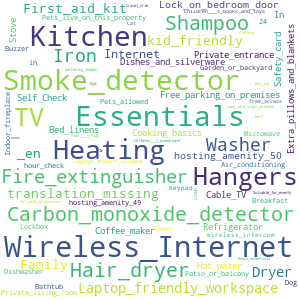

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
   # font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c)  #우리는 아까 counter로 c를 만들어서 이거 넣은 거야. text그냥 넣어도 된대.
wordcloud.to_image()

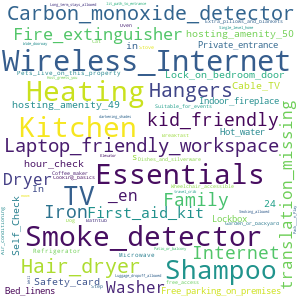

In [ ]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
   # font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(d)  #우리는 아까 counter로 c를 만들어서 이거 넣은 거야. text그냥 넣어도 된대.
wordcloud.to_image()

##### Mission

In [ ]:
Mission_good.head

<bound method NDFrame.head of       Unnamed: 0  price  ... distance_to_Mission          landmark
0              0   85.0  ...                1.50  Mission district
1              1  150.0  ...                1.98  Mission district
3              3  325.0  ...                2.20  Mission district
4              4  270.0  ...                1.68  Mission district
6              6  175.0  ...                0.87  Mission district
...          ...    ...  ...                 ...               ...
1982        1982  375.0  ...                2.02  Mission district
1984        1984  165.0  ...                0.58  Mission district
1985        1985  315.0  ...                0.75  Mission district
1990        1990   80.0  ...                1.90  Mission district
1991        1991  109.0  ...                1.56  Mission district

[596 rows x 27 columns]>

In [ ]:
M_good_amenities = Mission_good['array_amenities']
M_good_amenities.to_csv("M_good_amenities.csv")
with open(r'/content/M_good_amenities.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',array_amenities\n',
 '0,"[\'TV\', \'Wireless_Internet\', \'Heating\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'First_aid_kit\', \'Fire_extinguisher\', \'Essentials\', \'Hangers\', \'Laptop_friendly_workspace\']"\n',
 '1,"[\'TV\', \'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Washer\', \'Dryer\', \'Smoke_detector\', \'First_aid_kit\', \'Safety_card\', \'Essentials\', \'Shampoo\', \'Lock_on_bedroom_door\', \'Hangers\', \'Iron\', \'Laptop_friendly_workspace\', \'Private_living_room\']"\n',
 '3,"[\'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Free_parking_on_premises\', \'Heating\', \'Family/kid_friendly\', \'Hair_dryer\', \'Iron\', \'translation_missing:_en.hosting_amenity_50\']"\n',
 '4,"[\'TV\', \'Washer\', \'Cable_TV\', \'Dryer\', \'Wireless_Internet\', \'Kitchen\', \'Essentials\', \'Free_parking_on_premises\', \'Hangers\', \'Hair_dryer\', \'Hot_water\', \'Iron\', \'Gym\', \'Elevator\', \'Bed_linens\', \'Extra_pillows_and_blankets\', \'Ethernet_connection\', \'H

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

#특수문자 제거
import re
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

import nltk
nltk.download('all')

text = nltk.word_tokenize(filtered_content)

from collections import Counter
e= Counter(text)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
M_bad_amenities = Mission_Bad['array_amenities']
M_bad_amenities.to_csv("M_bad_amenities.csv")
with open(r'/content/M_bad_amenities.csv','r',encoding='cp949') as f:
    text=f.readlines()
text

[',array_amenities\n',
 '2,"[\'TV\', \'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Heating\']"\n',
 '5,"[\'Wireless_Internet\', \'Heating\', \'Smoke_detector\', \'Essentials\', \'24-hour_check-in\', \'Hangers\', \'Laptop_friendly_workspace\', \'translation_missing:_en.hosting_amenity_49\', \'translation_missing:_en.hosting_amenity_50\']"\n',
 '10,"[\'TV\', \'Wireless_Internet\', \'Kitchen\', \'Washer\', \'Dryer\', \'Essentials\', \'Laptop_friendly_workspace\', \'Self_Check-In\', \'Lockbox\', \'Private_entrance\']"\n',
 '18,"[\'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Heating\', \'Smoke_detector\', \'Carbon_monoxide_detector\', \'First_aid_kit\', \'Safety_card\', \'Fire_extinguisher\', \'Essentials\', \'translation_missing:_en.hosting_amenity_49\', \'translation_missing:_en.hosting_amenity_50\', \'Self_Check-In\', \'Lockbox\']"\n',
 '40,"[\'TV\', \'Cable_TV\', \'Internet\', \'Wireless_Internet\', \'Kitchen\', \'Washer\', \'Dryer\', \'Smoke_detector\', \'Carbon_monoxide_de

In [ ]:
text_strip=list([i.strip() for i in text if i !='\n'])
text_join=' '.join(text_strip)
text_join

#특수문자 제거
import re
filtered_content=re.sub(r'[^\d\s\w]',' ', text_join)
filtered_content

import nltk
nltk.download('all')

text = nltk.word_tokenize(filtered_content)

from collections import Counter
f= Counter(text)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

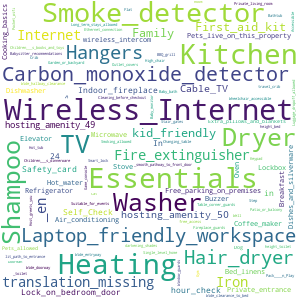

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
   # font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(e)  #우리는 아까 counter로 c를 만들어서 이거 넣은 거야. text그냥 넣어도 된대.
wordcloud.to_image()

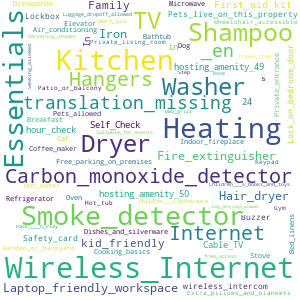

In [ ]:
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
   # font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(f)  #우리는 아까 counter로 c를 만들어서 이거 넣은 거야. text그냥 넣어도 된대.
wordcloud.to_image()

## Golden

### Price

In [ ]:
print(Golden_good.price.median())
print(Golden_Bad.price.median())

#확실히 리뷰 낮은 애가 가격이 낮네.. 싼 게 비지떡

177.99999994800876
120.00000002615452


### cancellation policy 

In [ ]:
print(Golden_good.groupby(["cancellation_policy"]).review_scores_rating.count())
print(Golden_Bad.groupby(["cancellation_policy"]).review_scores_rating.count())

cancellation_policy
flexible    26
moderate    24
strict      39
Name: review_scores_rating, dtype: int64
cancellation_policy
flexible    23
moderate    24
strict      36
Name: review_scores_rating, dtype: int64


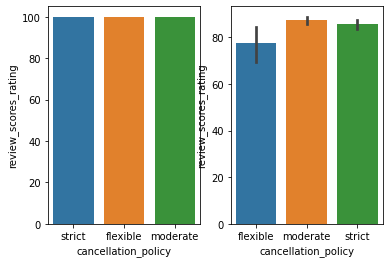

In [ ]:
fig,ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.barplot(data = Golden_good, x = 'cancellation_policy', y ='review_scores_rating')
plt.ylim = (0,100)
plt.subplot(1,2,2)
sns.barplot(data = Golden_Bad, x='cancellation_policy', y ='review_scores_rating')
plt.ylim = (0,100)
plt.show()

#리뷰가 안 좋은 경우에는 flexible이 특히 안 좋네. 근데 fexible이라서 안 좋은 건 아닐 것 같고, 아마.. flexible = bad quality? 
#어쩌면 flexible이면 신경 안 쓸 수도ㅋㅋ / 덜 고급짐?

#### cancellation policy & bedrooms, accommodates, beds -> 꽤 유의미! (bad는 host들이 airbnb를 잘 이해 못 하는 걸 수도!)

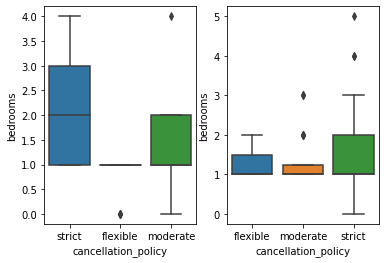

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Golden_good, x = 'cancellation_policy', y ='bedrooms')
plt.subplot(1,2,2)
sns.boxplot(data = Golden_Bad, x = 'cancellation_policy', y ='bedrooms')
plt.show()

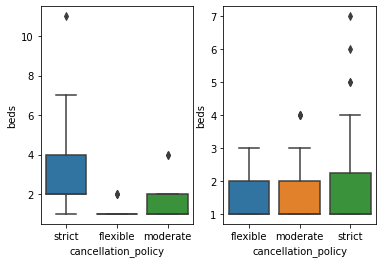

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Golden_good, x = 'cancellation_policy', y ='beds')
plt.subplot(1,2,2)
sns.boxplot(data = Golden_Bad, x = 'cancellation_policy', y ='beds')
plt.show()

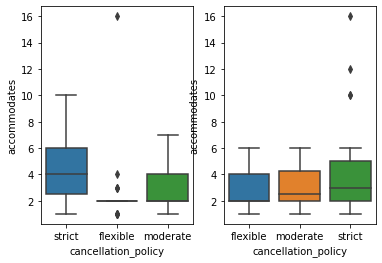

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Golden_good, x = 'cancellation_policy', y ='accommodates')
plt.subplot(1,2,2)
sns.boxplot(data = Golden_Bad, x = 'cancellation_policy', y ='accommodates')
plt.show()

### Acommodates, Bathrooms -> 무의미

In [ ]:
print(Golden_good.groupby(['accommodates']).price.count())
print(Golden_Bad.groupby(['accommodates']).price.count())
print(Golden_good.groupby(['bathrooms']).price.count())
print(Golden_Bad.groupby(['bathrooms']).price.count())

accommodates
1     12
2     33
3      6
4     16
5      7
6      7
7      4
8      2
10     1
16     1
Name: price, dtype: int64
accommodates
1      9
2     34
3      6
4     14
5      7
6      9
10     2
12     1
16     1
Name: price, dtype: int64
bathrooms
1.0    64
1.5     5
2.0    12
2.5     5
3.0     1
3.5     1
4.5     1
Name: price, dtype: int64
bathrooms
1.0    70
1.5     3
2.0     7
2.5     3
Name: price, dtype: int64


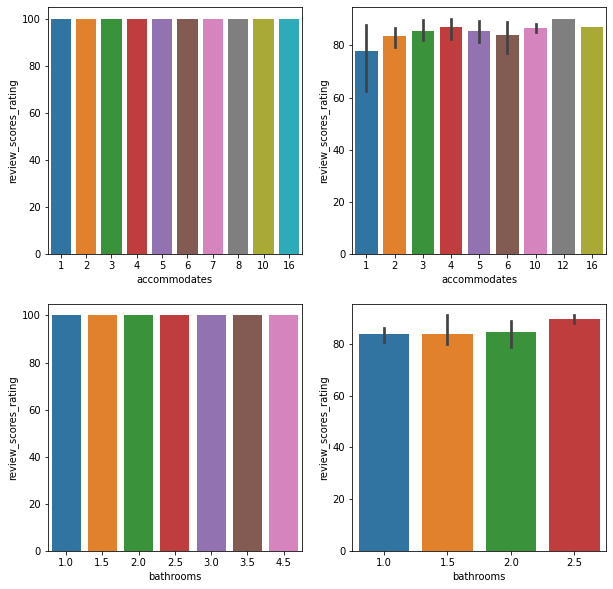

In [ ]:
figure, ax = plt.subplots(2, 2, figsize = (10,10))
plt.subplot(2,2,1)
sns.barplot(data = Golden_good, x = 'accommodates', y = 'review_scores_rating')
plt.subplot(2,2,2)
sns.barplot(data = Golden_Bad, x = 'accommodates', y = 'review_scores_rating')
plt.subplot(2,2,3)
sns.barplot(data = Golden_good, x = 'bathrooms', y = 'review_scores_rating')
plt.subplot(2,2,4)
sns.barplot(data = Golden_Bad, x = 'bathrooms', y = 'review_scores_rating')
plt.show()

#accommodates = 12-> 아예 많은 게 나아. 뭔가 안 좋으니까 review가 안 좋을 텐데, 그래도 accommodates를 최대한 많이 받는 게 나을 듯
#bathrooms 개수가 작네.. 키우쟈. => 화장실 개수가 많을 수록 좋다고도 못 하겠어. 너무 데이터 개수가 작아.

### Instant Bookable

In [ ]:
print(Golden_good.groupby(['instant_bookable']).price.count())
print(Golden_Bad.groupby(['instant_bookable']).price.count())
#instant bookable은 없을 수록 인기가 좋네. -> 관리가 얼마나 빡센지를 조아하나봐. (상관관계)

instant_bookable
0    69
1    20
Name: price, dtype: int64
instant_bookable
0    57
1    26
Name: price, dtype: int64


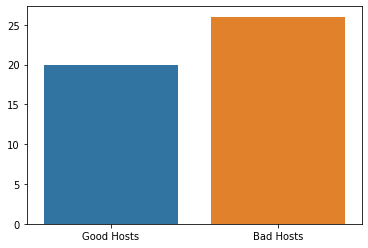

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [20, 26]}


In [ ]:
# Instant Bookable
hostbook_good = Golden_good[Golden_good.instant_bookable==1].count().instant_bookable
hostbook_bad = Golden_Bad[Golden_Bad.instant_bookable==1].count().instant_bookable
hostbook_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostbook_good,hostbook_bad]}

# #시각화
hostbook_bar = sns.barplot(x='x', y='y',data=hostbook_count)
plt.show()

# # 데이터
print(hostbook_count)

### host response rate -> 무의미

96.74871794871795


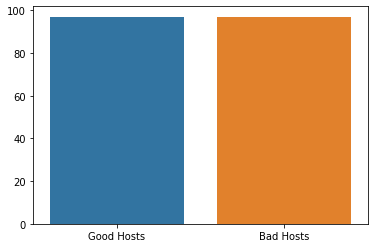

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [96.74871794871795, 97.04509283819628]}


In [ ]:
# Host Response Rate
hostresp_good =  Mission_good['host_response_rate'].mean()
hostresp_bad =  Mission_Bad['host_response_rate'].mean()
hostresp_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostresp_good,hostresp_bad]}
print(hostresp_good)

# #시각화
hostresp_bar = sns.barplot(x='x', y='y',data=hostresp_count)
plt.show()

# # 데이터
print(hostresp_count)

### host verified 

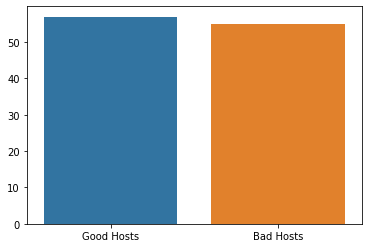

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [57, 55]}


In [ ]:
hostveri_good = Golden_good[Golden_good.host_identity_verified==1].count().host_identity_verified
hostveri_bad = Golden_Bad[Golden_Bad.host_identity_verified==1].count().host_identity_verified
hostveri_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostveri_good,hostveri_bad]}

# #시각화
hostveri_bar = sns.barplot(x='x', y='y',data=hostveri_count)
plt.show()

# # 데이터
print(hostveri_count)

### number of reviews

In [ ]:
print(Golden_good.number_of_reviews.median())
print(Golden_Bad.number_of_reviews.median())

#예상 외로 bad가 reviews가 많아. 아까 가격이 쌌잖아. 접근성이 좋아서 리뷰가 많은 가봐.
#흠, 그렇다면 무조건 리뷰가 높을 수록, 즉 고급질 수록 이득이라고 하기도 어렵겠네.

#리뷰 수가 많으면 점진적으로 내려가.

4.0
12.0


## Mission

### Price

In [ ]:
print(Mission_good.price.median())
print(Mission_Bad.price.median())

#확실히 리뷰 낮은 애가 가격이 낮네.. 싼 게 비지떡

184.99999998551
149.00000000812662


### cancellation policy

In [ ]:
print(Mission_good.price.median())
print(Mission_Bad.price.median())

184.99999998551
149.00000000812662


In [ ]:
print(Mission_good.groupby(["cancellation_policy"]).review_scores_rating.count())
print(Mission_Bad.groupby(["cancellation_policy"]).review_scores_rating.count())

#여기서는 Bad가 flexible의 개수가 Good에 비해서 확 적네! 여기서는 flexible을 선호하나봐..
# 아마도.

cancellation_policy
flexible           166
moderate           170
strict             258
super_strict_30      2
Name: review_scores_rating, dtype: int64
cancellation_policy
flexible           118
moderate           170
strict             235
super_strict_30      4
Name: review_scores_rating, dtype: int64


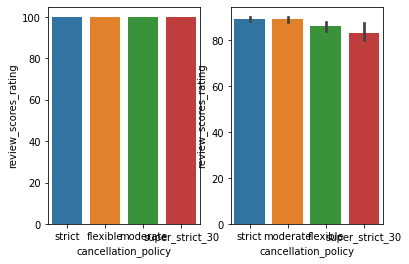

In [ ]:
fig,ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.barplot(data = Mission_good, x = 'cancellation_policy', y ='review_scores_rating')
plt.ylim = (0,100)
plt.subplot(1,2,2)
sns.barplot(data = Mission_Bad, x='cancellation_policy', y ='review_scores_rating')
plt.ylim = (0,100)
plt.show()

#super_strict는 장기투숙 확실!


#### cancellation policy & bedrooms, accommodates, beds

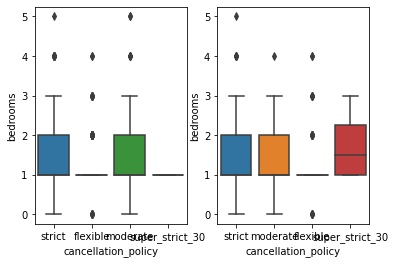

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Mission_good, x = 'cancellation_policy', y ='bedrooms')
plt.subplot(1,2,2)
sns.boxplot(data = Mission_Bad, x = 'cancellation_policy', y ='bedrooms')
plt.show()

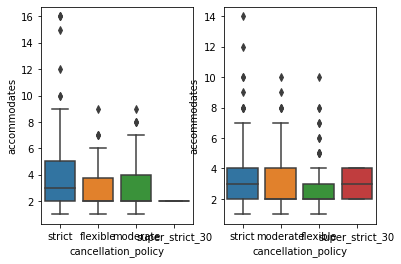

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Mission_good, x = 'cancellation_policy', y ='accommodates')
plt.subplot(1,2,2)
sns.boxplot(data = Mission_Bad, x = 'cancellation_policy', y ='accommodates')
plt.show()

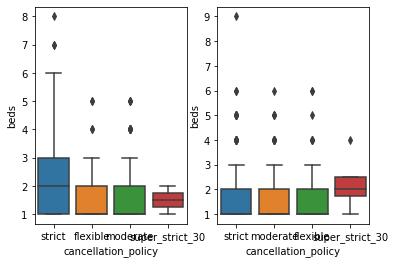

In [ ]:
fig, ax = plt.subplots(1,2)

plt.subplot(1,2,1)
sns.boxplot(data = Mission_good, x = 'cancellation_policy', y ='beds')
plt.subplot(1,2,2)
sns.boxplot(data = Mission_Bad, x = 'cancellation_policy', y ='beds')
plt.show()

#strict 침대 개수가 충분치 않네!!! 이것만 Golden이랑 비슷하네. 

"""침대 개수를 늘리면 리뷰를 더 좋게 받을 수도!!!!"""

### Acoomadates, Beds -> 무의미


In [ ]:
print(Mission_good.groupby(['accommodates']).price.count())
print(Mission_Bad.groupby(['accommodates']).price.count())
print(Mission_good.groupby(['bathrooms']).price.count())
print(Mission_Bad.groupby(['bathrooms']).price.count())

accommodates
1      67
2     260
3      35
4     113
5      27
6      55
7      10
8      19
9       3
10      2
12      1
15      1
16      3
Name: price, dtype: int64
accommodates
1      58
2     226
3      53
4      97
5      30
6      37
7       9
8       9
9       2
10      4
12      1
14      1
Name: price, dtype: int64
bathrooms
0.0      3
1.0    409
1.5     52
2.0     84
2.5     20
3.0     18
3.5      7
4.0      1
5.0      1
Name: price, dtype: int64
bathrooms
0.0      1
1.0    394
1.5     47
2.0     64
2.5      8
3.0      5
3.5      4
4.0      2
4.5      1
5.0      1
Name: price, dtype: int64


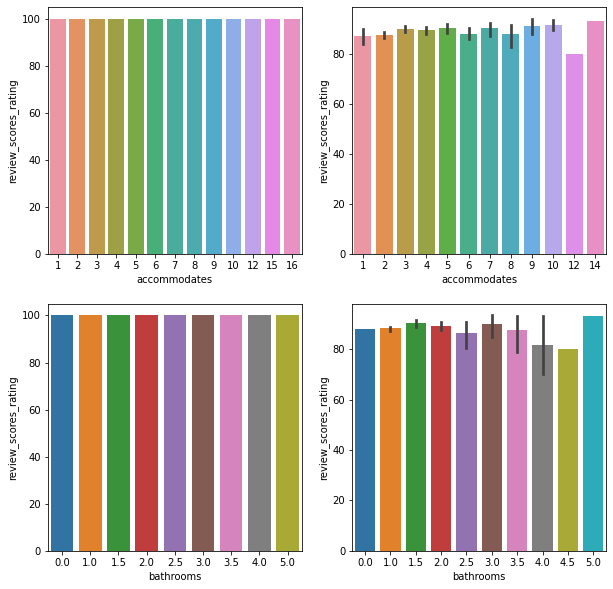

In [ ]:
figure, ax = plt.subplots(2, 2, figsize = (10,10))
plt.subplot(2,2,1)
sns.barplot(data = Mission_good, x = 'accommodates', y = 'review_scores_rating')
plt.subplot(2,2,2)
sns.barplot(data = Mission_Bad, x = 'accommodates', y = 'review_scores_rating')
plt.subplot(2,2,3)
sns.barplot(data = Mission_gooㅠd, x = 'bathrooms', y = 'review_scores_rating')
plt.subplot(2,2,4)
sns.barplot(data = Mission_Bad, x = 'bathrooms', y = 'review_scores_rating')
plt.show()


### Instant Bookable

In [ ]:
print(Mission_good.groupby(['instant_bookable']).price.count())
print(Mission_Bad.groupby(['instant_bookable']).price.count())  
#instant bookable은 없을 수록 인기가 좋네. -> 관리가 얼마나 빡센지를 조아하나봐. (상관관계)

instant_bookable
0    490
1    106
Name: price, dtype: int64
instant_bookable
0    400
1    127
Name: price, dtype: int64


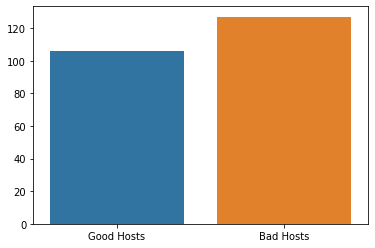

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [106, 127]}


In [ ]:
# Instant Bookable
hostbook_good = Mission_good[Mission_good.instant_bookable==1].count().instant_bookable
hostbook_bad = Mission_Bad[Mission_Bad.instant_bookable==1].count().instant_bookable
hostbook_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostbook_good,hostbook_bad]}

# #시각화
hostbook_bar = sns.barplot(x='x', y='y',data=hostbook_count)
plt.show()

# # 데이터
print(hostbook_count) 
#Golden에 비해 미약한 차이! 여전히 flexibe 시러함

### host response rate -> 무의미

96.74871794871795


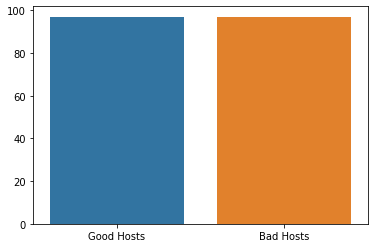

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [96.74871794871795, 97.04509283819628]}


In [ ]:
# Host Response Rate
hostresp_good =  Mission_good['host_response_rate'].mean()
hostresp_bad =  Mission_Bad['host_response_rate'].mean()
hostresp_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostresp_good,hostresp_bad]}
print(hostresp_good)

# #시각화
hostresp_bar = sns.barplot(x='x', y='y',data=hostresp_count)
plt.show()

# # 데이터
print(hostresp_count)

### host verified

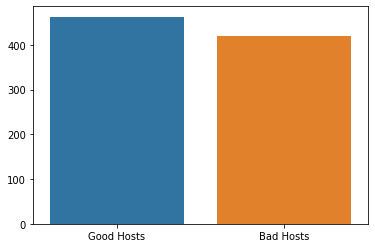

{'x': ['Good Hosts', 'Bad Hosts'], 'y': [463, 419]}


In [ ]:
hostveri_good = Mission_good[Mission_good.host_identity_verified==1].count().host_identity_verified
hostveri_bad = Mission_Bad[Mission_Bad.host_identity_verified==1].count().host_identity_verified
hostveri_count = {'x':['Good Hosts','Bad Hosts'],'y':[hostveri_good,hostveri_bad]}

# #시각화
hostveri_bar = sns.barplot(x='x', y='y',data=hostveri_count)
plt.show()

# # 데이터
print(hostveri_count)

#host verification 하자!! golden보다 차이가 더 크네. 
#찾아보니까 범죄율이 Mission이 좀 높은 편인가봐!

### number of reviews

In [ ]:
print(Mission_good.number_of_reviews.median())
print(Mission_Bad.number_of_reviews.median())

#예상 외로 bad가 reviews가 많아. 아까 가격이 쌌잖아. 접근성이 좋아서 리뷰가 많은 가봐.
#흠, 그렇다면 무조건 리뷰가 높을 수록, 즉 고급질 수록 이득이라고 하기도 어렵겠네.

3.0
11.0
